## Data Augmentation in Deep Learning

### 1. Definition and Core Concept

**Data Augmentation** is a **simple and smart technique** used to create or generate new data, especially when working with limited datasets. The primary idea is to take an existing image (a photo) and generate **multiple new images** by applying specific image transformations.

### 2. Primary Reasons for Using Data Augmentation

Data augmentation is used primarily to solve two major problems in deep learning:

#### A. Generating Data (Handling Data Scarcity)
*   **Need for Data:** Deep learning models, particularly CNNs, require a large amount of data. If sufficient data is unavailable, data augmentation can be used to generate synthetic data.
*   **Real-World Cost:** In industry, data gathering can be a **difficult and expensive process**. For example, in the medical field (like creating a malaria detection classifier), acquiring actual patients' biological cell images is costly. Data augmentation offers significant help in such cost-intensive domains.

#### B. Reducing Overfitting
*   Overfitting occurs when a model learns features specific to the training set that are not generalizable.
*   **Example:** If all training photos show a cat looking to the left, the model might incorrectly learn that "looking left" is a key feature of a cat.
*   By applying transformations (e.g., flipping the image so the cat is looking right), the model is forced to **generalize** and understand that the species looks in both directions, thereby **reducing the chance of overfitting**.

### 3. Image Transformations Used

Various image transformations can be applied to generate new training images. These are defined as parameters when setting up the data generator object:

| Transformation | Description | Example Parameters | Notes |
| :--- | :--- | :--- | :--- |
| **Rotation** | Rotates the image by a specified degree range. | `rotation_range=40` (40 degrees). | |
| **Flipping** | Changes orientation. | `horizontal_flip=True`. | **Vertical flipping** (`vertical_flip`) is usually avoided for natural images (like cats/dogs) because it results in non-sensical orientations (e.g., cat standing on its head). |
| **Zoom** | Zooms in or out. | `zoom_range=0.2`. | |
| **Shearing** | Applies a shear transformation. | `shear_range=0.2`. | |
| **Shifting** | Shifts the image horizontally or vertically. | `width_shift_range`, `height_shift_range`. | |
| **Brightness** | Adjusts the brightness of the image. | `brightness_range`. | |

### 4. Implementation using Keras

The implementation relies on the **`ImageDataGenerator` class** found within Keras preprocessing.

#### A. Setup and Object Creation
1.  **Import:** Import `ImageDataGenerator` and the `Image` module from Keras processing.
2.  **Image Loading:** Load the image using `image.load_img`. This loads the image as a **PIH (Python Imaging Library) object**, *not* a standard NumPy array.
3.  **Conversion:** The PIH object must be converted to a NumPy array (using a function like `image.img_to_array`) and then **reshaped** (e.g., from (200, 200, 3) to (1, 200, 200, 3)) to represent it as an input batch.
4.  **Data Generator Object:** An object (e.g., `data_gen`) is created from `ImageDataGenerator`, defining all the desired transformation parameters (e.g., `rotation_range`, `zoom_range`).

#### B. Handling Empty Space (`fill_mode`)
When images are shifted, empty space (pixels) may appear at the edges. The **`fill_mode`** parameter defines how these boundary pixels are filled:
*   **`nearest`**: Fills the empty area using nearby pixels.
*   **`reflect`**: Mirrors the image content at the boundary.
*   **`constant`**: Fills the area with a constant value, often resulting in black space.

#### C. Applying Augmentation Methods

1.  **Processing a Single Image:**
    *   The `.flow()` function is used to apply transformations to a **single input batch** (NumPy array).
    *   This function can be run within a loop (often infinite) that continuously generates new images, which are saved to a specified directory.

2.  **Processing an Entire Directory (for Training):**
    *   When data is already organized into class folders (e.g., Cats, Dogs), the function **`.flow_from_directory()`** is used.
    *   This method requires specifying the path to the data, the target size of the images, and the `class_mode` (e.g., `binary` for two classes).
    *   The generated images are stored in a generator object (e.g., `train_generator`).

### 5. Training with Data Augmentation

*   **Test Data Principle:** Data augmentation (transformations like rotation or shearing) should **not** be applied to the test or validation datasets. Only basic preprocessing, such as rescaling, is applied to these sets.
*   **Training Function:** When using an image data generator, the standard `model.fit()` function is replaced by **`model.fit_generator()`**.
*   **Data Usage:** It is important to note that the **original training images are not used**; only the augmented images generated by the transformation process are fed into the training pipeline.
***

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [4]:
img=load_img("./data_for_aug/cat.1.jpg",target_size=(256,256))

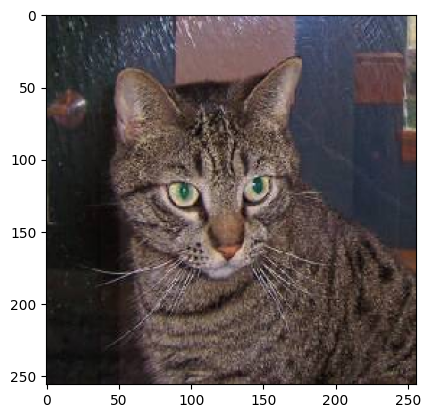

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [6]:
img_arr=img_to_array(img)
img_arr.shape

(256, 256, 3)

In [7]:
# making as a batch of one
img_arr = img_arr.reshape((1,) + img_arr.shape) 
img_arr.shape

(1, 256, 256, 3)

In [6]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
i = 0
for batch in datagen.flow(img_arr, batch_size=1,
                          save_to_dir='augmented_data', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

AttributeError: module 'scipy.ndimage' has no attribute 'interpolation'

## applying while modeling

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras import Sequential,regularizers
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout

data_augmentation = Sequential([
    layers.RandomFlip("horizontal",input_shape=(256,256,3)),    # random horizontal flips
    layers.RandomRotation(0.1),         # small rotations
    layers.RandomZoom(0.1),             # zoom
])

In [27]:
model=Sequential()


model.add(data_augmentation)
model.add(layers.Rescaling(1./255))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu",kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu",kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_15 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)     

In [18]:
# loading data using generator from keras
train_data=keras.utils.image_dataset_from_directory(
    "./training_set/training_set",
    labels="inferred",
    label_mode="int",
    batch_size=24,
    image_size=(256, 256)
)
val_data=keras.utils.image_dataset_from_directory(
    "./test_set/test_set",
    labels="inferred",
    label_mode="int",
    batch_size=24,
    image_size=(256, 256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [31]:
# no of images will be same but in each epoch different augmated image will be passed
model.fit_generator(
        train_data,
        epochs=10,
        validation_data=val_data)

Epoch 1/10


C:\Users\panka\AppData\Local\Temp\ipykernel_22488\1866150564.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


  4/334 [..............................] - ETA: 3:47 - loss: 6.5027 - accuracy: 0.5833

UnknownError: Graph execution error:

Detected at node 'sequential_9/max_pooling2d_15/MaxPool' defined at (most recent call last):
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\tornado\platform\asyncio.py", line 211, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\ipykernel\kernelbase.py", line 519, in dispatch_queue
      await self.process_one()
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\ipykernel\kernelbase.py", line 508, in process_one
      await dispatch(*args)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\ipykernel\ipkernel.py", line 368, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request
      reply_content = await reply_content
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\ipykernel\ipkernel.py", line 455, in do_execute
      res = shell.run_cell(
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\ipykernel\zmqshell.py", line 577, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\panka\AppData\Local\Temp\ipykernel_22488\1866150564.py", line 2, in <module>
      model.fit_generator(
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\training.py", line 2507, in fit_generator
      return self.fit(
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panka\anaconda3\envs\dl_py_9\lib\site-packages\keras\layers\pooling\base_pooling2d.py", line 84, in call
      outputs = self.pool_function(
Node: 'sequential_9/max_pooling2d_15/MaxPool'
CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(6105): 'cudnnPoolingForward( cudnn.handle(), pooling_desc.handle(), alpha, src_desc.handle(), input_ptr, beta, dest_desc.handle(), output_ptr)'
	 [[{{node sequential_9/max_pooling2d_15/MaxPool}}]] [Op:__inference_train_function_8491]